## Data Loading and Preprocessing

In [225]:
# importing required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import spacy
import string

In [226]:
df = pd.read_json("./problems_data.jsonl",lines=True)
df.head()

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree


2nd row has no input_description and no output_description -> maybe empty strings

In [227]:
# droping title, url, sample_io columns
df.drop(columns=["title", "url", "sample_io"], inplace=True)

In [47]:
df.shape

(4112, 5)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   description         4112 non-null   object 
 1   input_description   4112 non-null   object 
 2   output_description  4112 non-null   object 
 3   problem_class       4112 non-null   object 
 4   problem_score       4112 non-null   float64
dtypes: float64(1), object(4)
memory usage: 160.8+ KB


In [229]:
df.isnull().sum()

description           0
input_description     0
output_description    0
problem_class         0
problem_score         0
dtype: int64

No None, NaN values in the dataset

In [230]:
# checking for strings having "NA" or "N/A"
df.isin(["N/A", "NA", "n/a", 'na']).sum().sum()

0

In [231]:
# checking for empty strings in the dataset
df.isin([""]).sum().sum()

332

In [232]:
df.head()

,description,input_description,output_description,problem_class,problem_score
0,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7
1,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7
2,Mario and Luigi are playing a game where they ...,,,hard,9.6
3,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6
4,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6


In [233]:
# combining all columns about task description
# df["task_description"] = df["description"] + ", "+ df["input_description"] + ", " + df["output_description"]
df["task_description"] = df["input_description"] + ", " + df["output_description"]

In [239]:
df.head()

,description,input_description,output_description,problem_class,problem_score,task_description
0,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,The input consists of one line with two intege...
1,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,"The input consists of $10$ test cases, which a..."
2,Mario and Luigi are playing a game where they ...,,,hard,9.6,","
3,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,The first line contains two integers $L$ and $...
4,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,The first line of input consists of two intege...


In [240]:
# checking for rows having no task description
(df["task_description"] == ", ").sum()

118

In [237]:
df.shape

(4112, 6)

In [241]:
# dropping rows which have no task description
df["task_description"] = df["task_description"].replace(", ", np.nan)
df.dropna(subset=["task_description"], inplace=True)


In [242]:
# checking for rows having no task description
(df["task_description"] == ", ").sum()

0

Now all the rows in task_description column are not empty

## Text cleaning

In [243]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [244]:
import sys
print(sys.executable)

/Users/amareswarnagam/Desktop/autojudge-project/.venv/bin/python


In [245]:
df.loc[0, "task_description"]

'The input consists of one line with two integers\n    $N$ and $M$, the number of vertices and edges\n    your graph should have. Apart from the sample, there will be\n    only one test case, with $N =\n    100$ and $M =\n    500$., The output consists of $M$ lines where the $i$:th contains two integers\n    $u_ i$ and $v_ i$ ($1 \\leq u_ i, v_ i \\leq N$). This\n    indicates that the vertices $u_\n    i$ and $v_ i$ are\n    connected with an edge in your graph.'

The string new line characters and punctuations, uppercase characters etc.

In [246]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'hereby', 'it', 'among', 'why', "'re", 'about', 'itself', 'show', 'perhaps', 'did', 'forty', "'ve", 'nowhere', 'toward', 'over', 'many', 'beside', 'nor', 'each', 'only', 'across', 'upon', 'they', 'used', 'first', 'who', 'both', '‘s', 'four', 'whatever', 'ten', 'put', 'seeming', 'two', 'towards', 'except', 'never', 'another', 'everything', 'yours', 'not', 'if', 'where', 'its', 'whoever', 'few', 'fifty', 'he', 'any', 'twelve', 'sixty', 'up', 'anyway', 'none', 'thus', 'seem', '’ll', 'our', 'less', '’m', 'thru', 'you', '’ve', 'much', 'take', 'their', 'been', 'has', 'still', 'herein', 'whereby', 'via', 'can', '‘d', 'enough', 'done', 'alone', 'move', 'always', 'else', 'in', 'noone', 'name', 'seemed', 'the', 'as', 'anywhere', 'will', 'those', 'whom', 'she', 'amongst', 'had', 'ever', 'these', 'does', 'although', 'thereby', 'various', 'there', 'yourself', 'third', 'by', "'s", '’re', 'but', '‘m', 'should', 'yet', 'besides', 'side', 'thereafter', 'hereafter', 'since', 'nevertheless', 'whether', 

In [247]:
# for text cleaning and lemmatization
def transform_text(text):
  # remove newline characters
  text = text.replace("\n", " ")

  # remove punctuation
  for pun in string.punctuation:
    text = text.replace(pun, "")

  doc = nlp(text)

  # tokenize and convert words to lowercase
  text_tokens = [token.lemma_.lower() for token in doc]

  # remove stopwords
  meaningful_tokens = [i for i in text_tokens if i.isalnum() and i not in stopwords]

  return " ".join(meaningful_tokens)


In [248]:
text = "Tony-, I have to leave$ right now$. I *have a$ meeting )to attend."
transform_text(text)

'tony leave right meeting attend'

In [249]:
df["cleaned_task_desc"] = df["task_description"].apply(lambda x: transform_text(x))

<Axes: xlabel='problem_class', ylabel='count'>

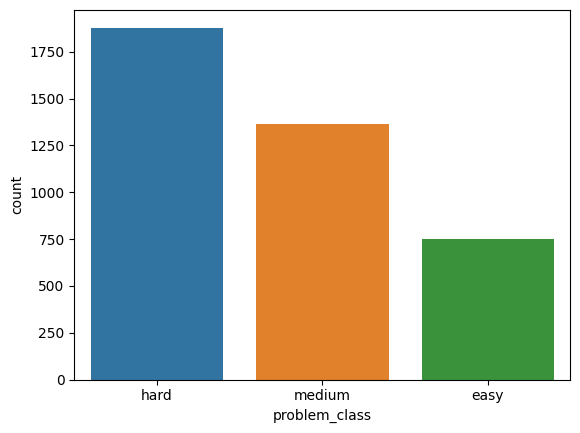

In [252]:
# EDAs
sns.countplot(data=df, x="problem_class", hue="problem_class")

In [253]:
df.shape

(3994, 7)

**Data is imbalanced**

In [258]:
df["num_characters"] = df["cleaned_task_desc"].apply(len)

In [259]:
df.head()

,description,input_description,output_description,problem_class,problem_score,task_description,cleaned_task_desc,num_characters
0,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,The input consists of one line with two intege...,input consist line integer n m number vertex e...,191
1,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,"The input consists of $10$ test cases, which a...",input consist 10 test case describe print k li...,129
3,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,The first line contains two integers $L$ and $...,line contain integer l n l length wire n numbe...,255
4,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,The first line of input consists of two intege...,line input consist integer n m 1 le n le 50 nu...,315
6,The objective of this problem is to train a Bi...,The program you submit should read no input.,,hard,9.6,"The program you submit should read no input.,",program submit read input,25


In [261]:
df["num_characters"].groupby(df["problem_class"]).describe()

,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,752.0,231.676862,118.045154,41.0,145.0,206.5,291.0,802.0
hard,1879.0,262.031932,139.023477,25.0,161.0,233.0,338.0,1028.0
medium,1363.0,264.178283,136.645408,38.0,163.0,238.0,343.0,1222.0


**hard problem have more characters on average**

In [262]:
X = df["cleaned_task_desc"]
y = df["problem_class"]

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [320]:
print(X_train.shape,X_test.shape)

(3195,) (799,)


In [266]:
tfidf = TfidfVectorizer(
    analyzer="word",
    ngram_range=(1, 2),
    min_df=5,
    max_features=50000
)
cv = CountVectorizer()
lr_clf = LogisticRegression()


svc_clf = SVC(kernel="linear")

In [267]:
from sklearn.pipeline import Pipeline

In [268]:
lr_pipe = Pipeline([("vec", tfidf), ("lr_clf", lr_clf)])


svc_pipe = Pipeline([("vec", tfidf), ("svc_clf", svc_clf)])

In [270]:
lr_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('lr_clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [271]:
y_test_pred = lr_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)
print(accuracy_on_test_data)

y_train_pred = lr_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)
print(accuracy_on_train_data)

0.5018773466833542
0.7527386541471048


In [272]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_pipe = Pipeline([("vec", tfidf), ("rf_clf", rf_clf)])

In [273]:
rf_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('rf_clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [274]:

y_test_pred = rf_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)
print(accuracy_on_test_data)

y_train_pred = rf_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)
print(accuracy_on_train_data)

0.4430538172715895
0.9762128325508607


In [275]:
et_clf = ExtraTreesClassifier(n_estimators=50)
et_pipe = Pipeline([("vec", tfidf), ("et_clf", et_clf)])

In [276]:
et_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('et_clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [277]:
y_test_pred = et_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)
print(accuracy_on_test_data)

y_train_pred = et_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)
print(accuracy_on_train_data)

0.4818523153942428
0.9937402190923318


In [354]:
linear_svc_clf = LinearSVC(C=0.005, class_weight="balanced")
linear_svc_pipe = Pipeline([("vec", tfidf), ("linear_svc_clf",  linear_svc_clf)])

In [355]:
linear_svc_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('linear_svc_clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [356]:
y_test_pred = linear_svc_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)
print(accuracy_on_test_data)

y_train_pred = linear_svc_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)
print(accuracy_on_train_data)

0.4881101376720901
0.5007824726134585


In [357]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average="macro")
f1_test  = f1_score(y_test, y_test_pred, average="macro")

print(f1_train, f1_test)

0.31950450694385885 0.28863437724601093


In [222]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=1000)),
    ("clf", MultinomialNB())
])

In [283]:
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [284]:
y_test_pred = pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)
print(accuracy_on_test_data)

y_train_pred = pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)
print(accuracy_on_train_data)

0.49436795994993743
0.5762128325508608


In [287]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=2,
        max_features=100000
    )),
    ("clf", ComplementNB())
])

pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [288]:
y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

from sklearn.metrics import accuracy_score
print("Test accuracy:", accuracy_score(y_test, y_test_pred))
print("Train accuracy:", accuracy_score(y_train, y_train_pred))

Test accuracy: 0.5193992490613266
Train accuracy: 0.8


In [289]:
y_train.value_counts(normalize=True)

problem_class
hard      0.470423
medium    0.341158
easy      0.188419
Name: proportion, dtype: float64

In [290]:
y_test.value_counts(normalize=True)

problem_class
hard      0.470588
medium    0.341677
easy      0.187735
Name: proportion, dtype: float64

In [313]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, y_test_pred))
f1_score(y_test, y_test_pred, average="macro")

              precision    recall  f1-score   support

        easy       0.43      0.38      0.40       150
        hard       0.55      0.68      0.61       376
      medium       0.41      0.30      0.35       273

    accuracy                           0.49       799
   macro avg       0.46      0.45      0.45       799
weighted avg       0.48      0.49      0.48       799



0.4509137962397127

In [314]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=5,
        max_features=50000
    )),
    ("clf", ComplementNB(alpha=1.5))
])

pipe.fit(X_train, y_train)



,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [315]:
from sklearn.metrics import classification_report, f1_score

y_test_pred = pipe.predict(X_test)

print(classification_report(y_test, y_test_pred))
print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))


              precision    recall  f1-score   support

        easy       0.43      0.38      0.40       150
        hard       0.55      0.68      0.61       376
      medium       0.41      0.30      0.35       273

    accuracy                           0.49       799
   macro avg       0.46      0.45      0.45       799
weighted avg       0.48      0.49      0.48       799

Macro F1: 0.4509137962397127


In [316]:
y_test_pred = pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)
print(accuracy_on_test_data)

y_train_pred = pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)
print(accuracy_on_train_data)

0.493116395494368
0.7035993740219092


In [ ]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average="macro")
f1_test  = f1_score(y_test, y_test_pred, average="macro")

print(f1_train, f1_test)

0.6789129144541527 0.4509137962397127
